In [ ]:
/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/ctgan/adult/adult_ctgan_execution_scores.json
"train_time_sec": 1019.8385624885559,
"sample_time_sec": 2.3177473545074463,
"peak_memory_mb": 101.74205,

In [42]:
import json
import pandas as pd

In [3]:
json_file_path = "/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/outputs/ctgan/adult/adult_ctgan_metrics.json"

In [4]:
with open(json_file_path, 'r') as json_file:
    data_dict = json.load(json_file)

In [116]:
human_readable = {
    "gaussian_copula": "Gaussian Copula (Statistical)", 
    "tvae": "TVAE (Variational Autoencoder)",
    "ctgan": "CTGAN (Generative Adversarial Network)", 
    "llm": "GReaT (LLM))"
}

In [10]:
# Extract and compute averages
domain_coverage = data_dict["coverage"]["domain_coverage"]
missing_values_coverage = data_dict["coverage"]["missing_values_coverage"]
outlier_coverage = data_dict["coverage"]["outlier_coverage"]

similarity_statistic = data_dict["similarity"]["statistic"]
ml_efficacy_stats = data_dict["ml_efficacy"]

similarity_distance = data_dict["similarity"]["distance"]
correlation= round(data_dict["similarity"]["correlation"], 2)

sdv_quality_score = round(data_dict["sdv_quality_report"]["score"], 2)


# Function to calculate the average of ml_efficacy values
def calculate_average_ml_efficacy(ml_efficacy_stats):
    total_diff = 0
    for classifier, scores in ml_efficacy_stats.items():
        if classifier == "timing":
            continue            
        total_diff = round(abs(scores["synthetic_f1"] - scores["real_f1"]), 2)
    
        print(classifier, total_diff)
        

# Calculate average similarity statistics
average_domain_coverage = round(sum(domain_coverage.values()) / len(domain_coverage), 2)
average_missing_values_coverage = round(sum(missing_values_coverage.values()) / len(missing_values_coverage), 2)
average_outlier_coverage = round(sum(outlier_coverage.values()) / len(outlier_coverage), 2)
average_similarity_statistic = round(sum(
    sum(measure.values()) / len(measure) for measure in similarity_statistic.values()
) / len(similarity_statistic), 2)

average_similarity_distance = round(sum(similarity_distance.values()) / len(similarity_distance), 2)

average_ml_efficacy = calculate_average_ml_efficacy(ml_efficacy_stats)

# Print computed averages
print("Average Domain Coverage:", average_domain_coverage)
print("Average Missing Values Coverage:", average_missing_values_coverage)
print("Average Outlier Coverage:", average_outlier_coverage)
print("Average Similarity Statistic:", average_similarity_statistic)
print("Average Similarity Distance:", average_similarity_distance)
print("Correlation:", correlation)
print("Distribution Similarity (SDV Quality Score):", sdv_quality_score)


adaboost_classification 0.01
decision_tree_classification 0.02
logistic_classification 0.04
mlp_classification 0.01
Average Domain Coverage: 0.89
Average Missing Values Coverage: 1.0
Average Outlier Coverage: 0.76
Average Similarity Statistic: 0.99
Average Similarity Distance: 0.32
Correlation: 0.8
Distribution Similarity (SDV Quality Score): 0.88


In [155]:
def get_ml_metrics(data_dict):
    ml_efficacy_stats = data_dict["ml_efficacy"]
    ml_metrics = {}
    for classifier, scores in ml_efficacy_stats.items():
        if classifier == "timing":
            continue            
        ml_metrics[classifier] = round(abs(scores["synthetic_f1"] - scores["real_f1"]), 2)
    return ml_metrics

# average_ml_efficacy = calculate_average_ml_efficacy(ml_efficacy_stats)
# average_ml_efficacy    

In [158]:
def get_model_perf(dn, model_names):
    # dataset_names = ["adult", "census", "child", "covtype", "credit", "intrusion", "health_insurance", "drugs", "loan"]
    out = {
        "Model": [], 
        "Adaboost": [],
        "Decision Tree": [], 
        "Logistic Regression": [], 
        "MLP": [],
    }

    for model in model_names:
        json_file_path = f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/outputs/{model}/{dn}/{dn}_{model}_metrics.json"

        with open(json_file_path, 'r') as json_file:
            data_dict = json.load(json_file)

        m = get_ml_metrics(data_dict)

        out["Model"].append(human_readable[model])
        out["Adaboost"].append(m["adaboost_classification"])
        out["Decision Tree"].append(m["decision_tree_classification"])
        out["Logistic Regression"].append(m["logistic_classification"])
        out["MLP"].append(m["mlp_classification"])

    out_df = pd.DataFrame(out)
    return out_df

In [159]:
model_names = [ "llm", "ctgan", "tvae", "gaussian_copula"]
get_model_perf("loan", model_names)

,Model,Adaboost,Decision Tree,Logistic Regression,MLP
0,GReaT (LLM)),0.17,0.25,0.14,0.32
1,CTGAN (Generative Adversarial Network),0.86,0.71,0.29,0.85
2,TVAE (Variational Autoencoder),0.18,0.14,0.15,0.38
3,Gaussian Copula (Statistical),0.62,0.56,0.16,0.67


In [161]:
def get_reg_ml_metrics(data_dict):
    ml_efficacy_stats = data_dict["ml_efficacy"]
    ml_metrics = {}
    for classifier, scores in ml_efficacy_stats.items():
        if classifier == "timing":
            continue            
        ml_metrics[classifier] = round(abs(scores["synthetic_r2"] - scores["real_r2"]), 2)
    return ml_metrics


In [162]:
def get_reg_model_perf(dn, model_names):
    # dataset_names = ["adult", "census", "child", "covtype", "credit", "intrusion", "health_insurance", "drugs", "loan"]
    out = {
        "Model": [], 
        "Linear Regression": [],
        "MLP": [],
    }

    for model in model_names:
        json_file_path = f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/outputs/{model}/{dn}/{dn}_{model}_metrics.json"

        with open(json_file_path, 'r') as json_file:
            data_dict = json.load(json_file)

        m = get_reg_ml_metrics(data_dict)

        out["Model"].append(human_readable[model])
        out["Linear Regression"].append(m["linear_regression"])
        out["MLP"].append(m["mlp_regression"])

    out_df = pd.DataFrame(out)
    return out_df


In [163]:
model_names = [ "llm", "ctgan", "tvae", "gaussian_copula"]
get_reg_model_perf("health_insurance", model_names)

,Model,Linear Regression,MLP
0,GReaT (LLM)),0.31,0.00
1,CTGAN (Generative Adversarial Network),0.95,0.01
2,TVAE (Variational Autoencoder),0.10,0.01
3,Gaussian Copula (Statistical),0.26,0.01


In [93]:
def get_metrics(data_dict):
    # Extract and compute averages
    domain_coverage = data_dict["coverage"]["domain_coverage"]
    missing_values_coverage = data_dict["coverage"]["missing_values_coverage"]
    outlier_coverage = data_dict["coverage"]["outlier_coverage"]

    similarity_statistic = data_dict["similarity"]["statistic"]

    similarity_distance = data_dict["similarity"]["distance"]
    correlation= round(data_dict["similarity"]["correlation"], 2)

    sdv_quality_score = round(data_dict["sdv_quality_report"]["score"], 2)

    # Calculate average similarity statistics
    # average_domain_coverage = round(sum(domain_coverage.values()) / len(domain_coverage), 2) if domain_coverage else 0
    # average_missing_values_coverage = round(sum(missing_values_coverage.values()) / len(missing_values_coverage), 2) if domain_coverage else 0
    # average_outlier_coverage = round(sum(outlier_coverage.values()) / len(outlier_coverage), 2) if outlier_coverage else 0
    # average_similarity_statistic = round(sum(
    #     sum(measure.values()) / len(measure) for measure in similarity_statistic.values()
    # ) / len(similarity_statistic), 2) if similarity_statistic else 0
    
    # Calculate average domain coverage
    if domain_coverage:
        domain_coverage_values = [value for value in domain_coverage.values() if not np.isnan(value)]
        average_domain_coverage = round(sum(domain_coverage_values) / len(domain_coverage_values), 2)
    else:
        average_domain_coverage = 0

    # Calculate average missing values coverage
    if missing_values_coverage:
        missing_values_coverage_values = [value for value in missing_values_coverage.values() if not np.isnan(value)]
        average_missing_values_coverage = round(sum(missing_values_coverage_values) / len(missing_values_coverage_values), 2)
    else:
        average_missing_values_coverage = 0

    # Calculate average outlier coverage
    if outlier_coverage:
        outlier_coverage_values = [value for value in outlier_coverage.values() if not np.isnan(value)]
        average_outlier_coverage = round(sum(outlier_coverage_values) / len(outlier_coverage_values), 2)
    else:
        average_outlier_coverage = 0

    # Calculate average similarity statistic
    if similarity_statistic:
        similarity_statistic_values = [value for measure in similarity_statistic.values() for value in measure.values() if not np.isnan(value)]
        average_similarity_statistic = round(sum(similarity_statistic_values) / len(similarity_statistic_values), 2)
    else:
        average_similarity_statistic = 0
    
    # Calculate average similarity distance
    if similarity_distance:
        similarity_distance_values = [value for value in similarity_distance.values() if not np.isnan(value)]
        average_similarity_distance = round(sum(similarity_distance_values) / len(similarity_distance_values), 2)
    else:
        average_similarity_distance = 0

    return {
        "average_domain_coverage": average_domain_coverage,
        "average_missing_values_coverage": average_missing_values_coverage, 
        "average_outlier_coverage": average_outlier_coverage,
        "average_similarity_statistic": average_similarity_statistic, 
        "average_similarity_distance": average_similarity_distance,
        "correlation": correlation, 
        "sdv_quality_score": sdv_quality_score
    }
    
    

    # # Print computed averages
    # print("Average Domain Coverage:", average_domain_coverage)
    # print("Average Missing Values Coverage:", average_missing_values_coverage)
    # print("Average Outlier Coverage:", average_outlier_coverage)
    # print("Average Similarity Statistic:", average_similarity_statistic)
    # print("Average Similarity Distance:", average_similarity_distance)
    # print("Correlation:", correlation)
    # print("Distribution Similarity (SDV Quality Score):", sdv_quality_score)

In [136]:
def get_model_perf(dn, model_names):
    # dataset_names = ["adult", "census", "child", "covtype", "credit", "intrusion", "health_insurance", "drugs", "loan"]
    out = {
        "Model": [], 
        "Domain Coverage": [],
        "Missing Values Coverage": [], 
        "Outlier Coverage": [], 
        "Similarity Statistics": [], 
        "Distribution Stability": [],
        "Similarity Distance": [], 
        "Correlation Difference": [], 
    }

    for model in model_names:
        json_file_path = f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/outputs/{model}/{dn}/{dn}_{model}_metrics.json"

        with open(json_file_path, 'r') as json_file:
            data_dict = json.load(json_file)

        m = get_metrics(data_dict)

        out["Model"].append(human_readable[model])
        out["Domain Coverage"].append(m["average_domain_coverage"])
        out["Missing Values Coverage"].append(m["average_missing_values_coverage"])
        out["Outlier Coverage"].append(m["average_outlier_coverage"])
        out["Similarity Statistics"].append(m["average_similarity_statistic"])
        out["Similarity Distance"].append(m["average_similarity_distance"])
        out["Correlation Difference"].append(m["correlation"])
        out["Distribution Stability"].append(m["sdv_quality_score"])

    out_df = pd.DataFrame(out)
    return out_df

In [147]:
model_names = [ "llm", "ctgan", "tvae", "gaussian_copula"]
out_df = get_model_perf("health_insurance", model_names)
# out_df

out_df.to_csv("cmp_health_insurance.csv")

In [148]:
model_names = [ "llm", "ctgan", "tvae", "gaussian_copula"]
get_model_perf("loan", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Distribution Stability,Similarity Distance,Correlation Difference
0,GReaT (LLM)),1.00,1.0,0.66,0.96,0.95,0.19,0.83
1,CTGAN (Generative Adversarial Network),0.99,1.0,0.69,0.96,0.93,0.20,2.13
2,TVAE (Variational Autoencoder),0.93,1.0,0.62,0.91,0.89,0.28,1.46
3,Gaussian Copula (Statistical),0.91,1.0,0.68,0.98,0.96,0.18,1.52


In [139]:
model_names = ["ctgan", "tvae", "gaussian_copula"]
get_model_perf("child", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Distribution Stability,Similarity Distance,Correlation Difference
0,CTGAN (Generative Adversarial Network),1.00,1.00,0,0,0.90,0,0.54
1,TVAE (Variational Autoencoder),1.00,1.00,0,0,0.96,0,0.35
2,Gaussian Copula (Statistical),0.97,0.99,0,0,0.80,0,2.15


In [98]:
model_names = ["ctgan", "tvae", "gaussian_copula"]
get_model_perf("covtype", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Similarity Distance,Correlation Stability,Distribution Stability
0,CTGAN (Generative Adversarial Network),0.69,1.0,0.48,0.97,0.09,4.93,0.94
1,TVAE (Variational Autoencoder),0.55,1.0,0.21,0.97,0.10,5.68,0.96
2,Gaussian Copula (Statistical),0.60,1.0,0.32,0.51,0.70,6.07,0.61


In [99]:
model_names = ["ctgan", "tvae", "gaussian_copula"]
get_model_perf("intrusion", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Similarity Distance,Correlation Stability,Distribution Stability
0,CTGAN (Generative Adversarial Network),0.53,1.0,0.32,0.90,0.15,7.69,0.82
1,TVAE (Variational Autoencoder),0.48,1.0,0.32,0.99,0.08,6.31,0.94
2,Gaussian Copula (Statistical),0.59,1.0,0.47,0.74,0.43,8.89,0.71


In [100]:
model_names = ["ctgan", "tvae", "gaussian_copula"]
get_model_perf("census", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Similarity Distance,Correlation Stability,Distribution Stability
0,CTGAN (Generative Adversarial Network),0.92,1.0,0.78,0.93,0.18,1.89,0.89
1,TVAE (Variational Autoencoder),0.92,1.0,0.76,0.95,0.14,2.02,0.93
2,Gaussian Copula (Statistical),0.94,1.0,0.65,0.84,0.37,7.71,0.67


In [101]:
model_names = ["ctgan", "tvae", "gaussian_copula"]
get_model_perf("adult", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Similarity Distance,Correlation Stability,Distribution Stability
0,CTGAN (Generative Adversarial Network),0.89,1.0,0.76,0.99,0.32,0.80,0.88
1,TVAE (Variational Autoencoder),0.80,1.0,0.68,0.99,0.30,0.94,0.91
2,Gaussian Copula (Statistical),0.94,1.0,0.38,0.96,0.40,2.13,0.74


In [102]:
model_names = ["ctgan", "tvae", "gaussian_copula"]
get_model_perf("drugs", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Similarity Distance,Correlation Stability,Distribution Stability
0,CTGAN (Generative Adversarial Network),0.90,0.95,1.0,0.96,0.18,6.35,0.82
1,TVAE (Variational Autoencoder),0.85,0.95,0.0,0.93,0.22,6.39,0.74
2,Gaussian Copula (Statistical),0.88,0.92,0.8,0.99,0.11,5.65,0.75


In [103]:
model_names = ["ctgan", "tvae", "gaussian_copula"]
get_model_perf("credit", model_names)

,Model,Domain Coverage,Missing Values Coverage,Outlier Coverage,Similarity Statistics,Similarity Distance,Correlation Stability,Distribution Stability
0,CTGAN (Generative Adversarial Network),0.18,1.0,0.93,1.00,0.08,3.24,0.97
1,TVAE (Variational Autoencoder),0.13,1.0,0.36,0.99,0.19,4.17,0.95
2,Gaussian Copula (Statistical),0.25,1.0,0.59,0.98,0.27,2.58,0.91


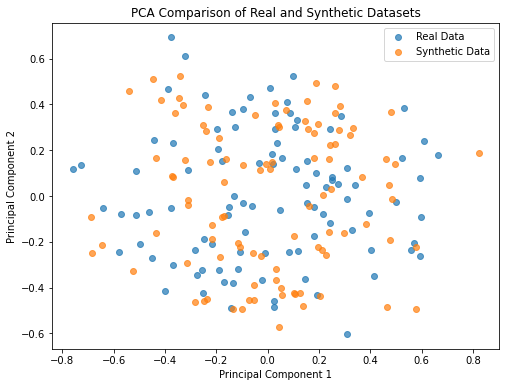

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate or load real and synthetic datasets (replace with your data)
real_data = np.random.rand(100, 5)  # Example: 100 samples, 5 features
synthetic_data = np.random.rand(100, 5)

# Combine datasets
combined_data = np.vstack((real_data, synthetic_data))

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Split into real and synthetic PCA results
real_pca = pca_result[:len(real_data)]
synthetic_pca = pca_result[len(real_data):]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data', alpha=0.7)
plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], label='Synthetic Data', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Comparison of Real and Synthetic Datasets')
plt.legend()
plt.show()


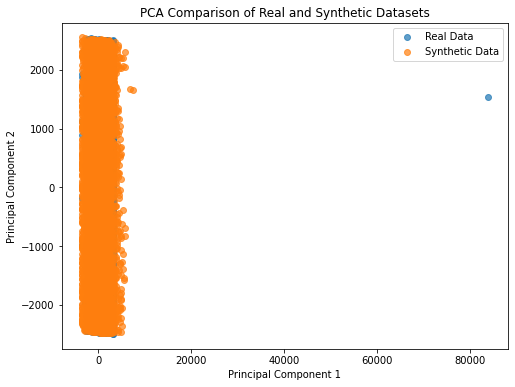

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example pandas DataFrames (replace with your actual DataFrames)
real_df = pd.read_csv("/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/sample_datasets/loan.csv")
# synthetic_df = pd.read_csv("/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/llm_out_25aug/loan/loan_synthetic_data.csv")
# synthetic_df = pd.read_csv("/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/ctgan/loan/loan_ctgan_synthetic_data.csv")
synthetic_df = pd.read_csv("/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/tvae/loan/loan_tvae_synthetic_data.csv")
synthetic_df = pd.read_csv("/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/gaussian_copula/loan/loan_gaussian_copula_synthetic_data.csv")

if 'Unnamed: 0' in synthetic_df.columns:
    synthetic_df.drop(columns=['Unnamed: 0'], inplace=True)

# Extract numerical data from DataFrames
real_data = real_df.select_dtypes(include=[np.number]).values
synthetic_data = synthetic_df.select_dtypes(include=[np.number]).values

# Combine datasets
combined_data = np.vstack((real_data, synthetic_data))

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Split into real and synthetic PCA results
real_pca = pca_result[:len(real_data)]
synthetic_pca = pca_result[len(real_data):]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data', alpha=0.7)
plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], label='Synthetic Data', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Comparison of Real and Synthetic Datasets')
plt.legend()
plt.show()


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

mn = "gaussian_copula" # gaussian_copula
dn = "health_insurance"

def get_pca(mn, dn):
    # Example pandas DataFrames (replace with your actual DataFrames)
    real_df = pd.read_csv(f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/sample_datasets/{dn}.csv")
    
    if mn == "llm":
        synthetic_df = pd.read_csv(f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/llm_out_25aug/{dn}/{dn}_synthetic_data.csv")
    else:
        synthetic_df = pd.read_csv(f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/{mn}/{dn}/{dn}_{mn}_synthetic_data.csv")

    if 'Unnamed: 0' in synthetic_df.columns:
        synthetic_df.drop(columns=['Unnamed: 0'], inplace=True)

    # Extract numerical data from DataFrames
    real_data = real_df.select_dtypes(include=[np.number]).values
    synthetic_data = synthetic_df.select_dtypes(include=[np.number]).values

    # Combine datasets
    combined_data = np.vstack((real_data, synthetic_data))

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(combined_data)

    # Split into real and synthetic PCA results
    real_pca = pca_result[:len(real_data)]
    synthetic_pca = pca_result[len(real_data):]

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data', alpha=0.7)
    plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], label='Synthetic Data', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Comparison of Real and Synthetic Datasets')
    plt.legend()
    plt.show()


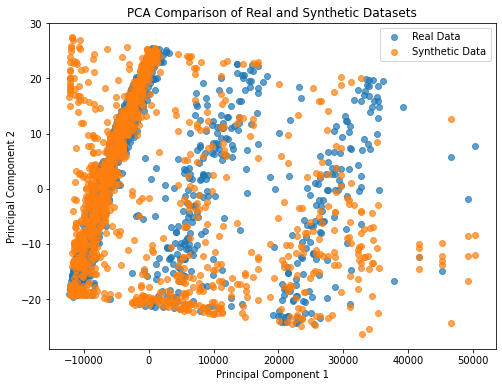

In [82]:
get_pca("llm", "health_insurance")

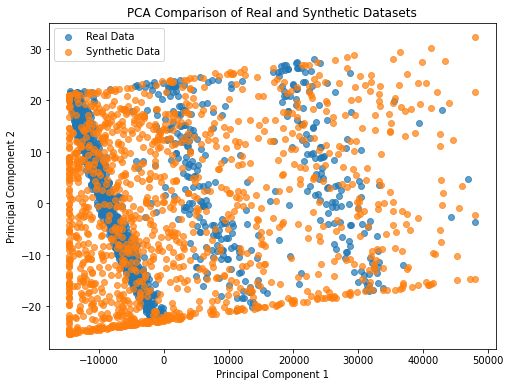

In [83]:
get_pca("ctgan", "health_insurance")

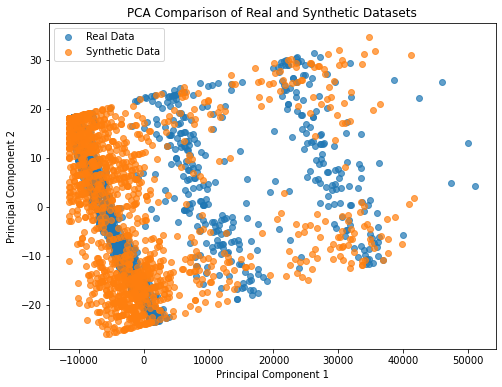

In [84]:
get_pca("tvae", "health_insurance")

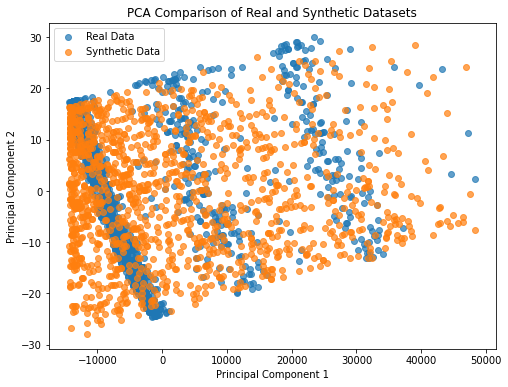

In [87]:
get_pca("gaussian_copula", "health_insurance")

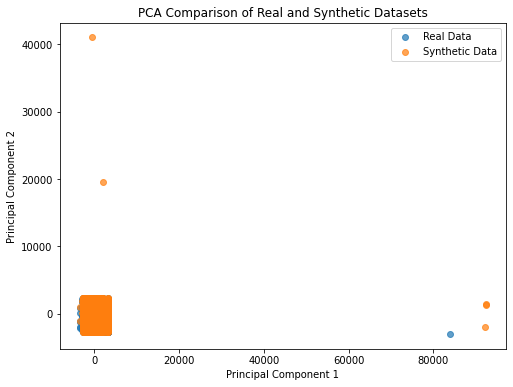

In [88]:
get_pca("llm", "loan")

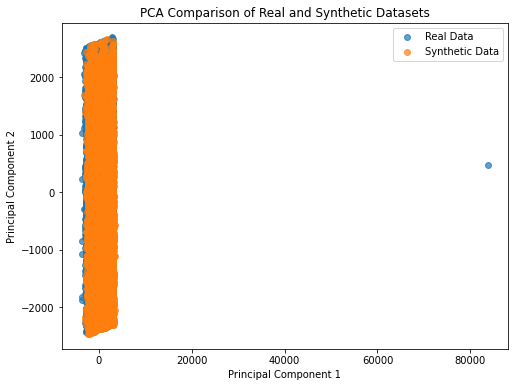

In [89]:
get_pca("ctgan", "loan")

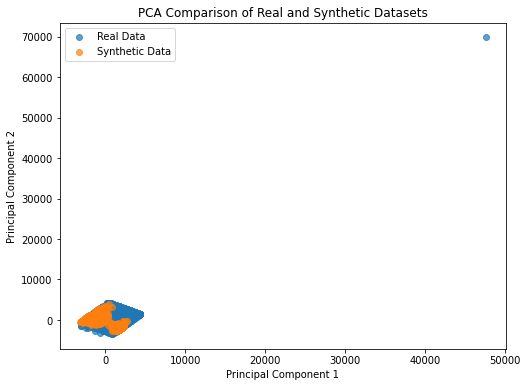

In [90]:
get_pca("tvae", "loan")

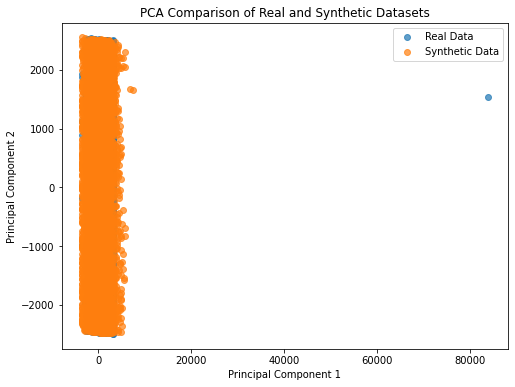

In [91]:
get_pca("gaussian_copula", "loan")

In [114]:
dn = "loan"
mn = "ctgan"

with open(f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/{mn}/{dn}/{dn}_{mn}_execution_scores.json", 'r') as json_file:
    r_dict = json.load(json_file)

# r_dict["num_sampled_rows"]
# r_dict["num_cols"]
# r_dict["train_time_sec"]
# r_dict["sample_time_sec"]
# r_dict["peak_memory_mb"]
def get_model_perf(dn, model_names):
    # dataset_names = ["adult", "census", "child", "covtype", "credit", "intrusion", "health_insurance", "drugs", "loan"]
    out = {
        "Model": [], 
        "Domain Coverage": [],
        "Missing Values Coverage": [], 
        "Outlier Coverage": [], 
        "Similarity Statistics": [], 
        "Similarity Distance": [], 
        "Correlation Stability": [], 
        "Distribution Stability": []
    }

    for model in model_names:
        json_file_path = f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/outputs/{model}/{dn}/{dn}_{model}_metrics.json"

        with open(json_file_path, 'r') as json_file:
            data_dict = json.load(json_file)

        m = get_metrics(data_dict)

        out["Model"].append(human_readable[model])
        out["Domain Coverage"].append(m["average_domain_coverage"])
        out["Missing Values Coverage"].append(m["average_missing_values_coverage"])
        out["Outlier Coverage"].append(m["average_outlier_coverage"])
        out["Similarity Statistics"].append(m["average_similarity_statistic"])
        out["Similarity Distance"].append(m["average_similarity_distance"])
        out["Correlation Stability"].append(m["correlation"])
        out["Distribution Stability"].append(m["sdv_quality_score"])

    out_df = pd.DataFrame(out)
    return out_df

10.730754

In [123]:
dn = "loan"
mn = "gaussian_copula" # gaussain_copula
with open(f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/{mn}/{dn}/{dn}_{mn}_execution_scores.json", 'r') as json_file:
    r_dict = json.load(json_file)
r_dict

{'lib': 'SDV_1.2.1',
 'modality': 'tabular',
 'synthesizer': 'gaussian_copula',
 'dataset': 'loan',
 'num_rows': 4000,
 'num_cols': 14,
 'num_sampled_rows': 5000,
 'device': 'CPU',
 'num_epochs': 0,
 'train_time_sec': 3.711303234100342,
 'sample_time_sec': 0.3798370361328125,
 'peak_memory_mb': 5.018223,
 'synthesizer_size': 0.126137,
 'synthetic_dataset_size_mb_deep': 0.560128,
 'train_dataset_size_mb_deep': 0.48,
 'synthetic_dataset_size_mb': 0.560128,
 'train_dataset_size_mb': 0.48}

In [ ]:
dn = "loan"
mn = "gaussian_copula" # gaussain_copula
with open(f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/az_outputs_23aug/2023-08-20/sdv/tabular/{mn}/{dn}/{dn}_{mn}_execution_scores.json", 'r') as json_file:
    r_dict = json.load(json_file)
r_dict

In [119]:
dn = "loan"
with open(f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/llm_out_25aug/{dn}/report.json", 'r') as json_file:
    r_dict = json.load(json_file)
r_dict

{'epochs': 100,
 'dataset_name': 'loan',
 'num_rows': 5000,
 'num_cols': 14,
 'num_samples': 5000,
 'train_num_rows': 4000,
 'train_time': 2870.9475898742676,
 'peak_memory_mb': 203.695731,
 'sample_time': 35.6428439617157}

In [118]:
# r_dict["num_samples"]
# r_dict["num_cols"]
# r_dict["train_time"]
# r_dict["sample_time"]
# r_dict["peak_memory_mb"]

In [ ]:
def get_model_perf(dn, model_names):
    # dataset_names = ["adult", "census", "child", "covtype", "credit", "intrusion", "health_insurance", "drugs", "loan"]
    out = {
        "Model": [], 
        "Domain Coverage": [],
        "Missing Values Coverage": [], 
        "Outlier Coverage": [], 
        "Similarity Statistics": [], 
        "Similarity Distance": [], 
        "Correlation Stability": [], 
        "Distribution Stability": []
    }

    for model in model_names:
        json_file_path = f"/Users/anshusingh/DPPCC/whitespace/benchmarking-synthetic-data-generators/outputs/{model}/{dn}/{dn}_{model}_metrics.json"

        with open(json_file_path, 'r') as json_file:
            data_dict = json.load(json_file)

        m = get_metrics(data_dict)

        out["Model"].append(human_readable[model])
        out["Domain Coverage"].append(m["average_domain_coverage"])
        out["Missing Values Coverage"].append(m["average_missing_values_coverage"])
        out["Outlier Coverage"].append(m["average_outlier_coverage"])
        out["Similarity Statistics"].append(m["average_similarity_statistic"])
        out["Similarity Distance"].append(m["average_similarity_distance"])
        out["Correlation Stability"].append(m["correlation"])
        out["Distribution Stability"].append(m["sdv_quality_score"])

    out_df = pd.DataFrame(out)
    return out_df

In [ ]:
 # "4h 26m 59s" is 16,019 seconds.

In [ ]:
# 4h 26m 59s
# intrusion_tvae_def_SDV

# 3h 35m 34s

In [164]:
{
    "synthesizer": "llm",
    "epochs": 100,
    "dataset_name": "health_insurance",
    "train_time_sec": 476.2044608592987,
    "peak_memory_mb": 203.582248,
    "sample_time_sec": 6.975155353546143
}

{
    "synthesizer": "ctgan",
    "dataset": "health_insurance",
    "num_epochs": 300,
    "train_time_sec": 24.41493248939514,
    "sample_time_sec": 0.18914246559143066,
    "peak_memory_mb": 2.309114,
}

{
    "synthesizer": "tvae",
    "dataset": "health_insurance",
    "num_epochs": 300,
    "train_time_sec": 11.382400512695312,
    "sample_time_sec": 0.1403203010559082,
    "peak_memory_mb": 2.076892,
}

{
    "synthesizer": "gaussian_copula",
    "dataset": "health_insurance",
    "num_epochs": 0,
    "train_time_sec": 1.5321803092956543,
    "sample_time_sec": 0.12971162796020508,
    "peak_memory_mb": 1.288113,
}

{'synthesizer': 'gaussian_copula',
 'dataset': 'health_insurance',
 'num_epochs': 0,
 'train_time_sec': 1.5321803092956543,
 'sample_time_sec': 0.12971162796020508,
 'peak_memory_mb': 1.288113}

In [165]:

{
    "synthesizer": "llm",
    "epochs": 100,
    "dataset_name": "loan",
    "train_time_sec": 2870.9475898742676,
    "peak_memory_mb": 203.695731,
    "sample_time_sec": 35.6428439617157
}

{
    "synthesizer": "ctgan",
    "dataset": "loan",
    "num_epochs": 300,
    "train_time_sec": 79.54400062561035,
    "sample_time_sec": 0.41701245307922363,
    "peak_memory_mb": 10.730754
}



{
    "synthesizer": "tvae",
    "dataset": "loan",
    "num_epochs": 300,
    "train_time_sec": 55.18127369880676,
    "sample_time_sec": 0.3914930820465088,
    "peak_memory_mb": 10.728637,
}

{
    "synthesizer": "gaussian_copula",
    "dataset": "loan",
    "num_epochs": 0,
    "train_time_sec": 3.711303234100342,
    "sample_time_sec": 0.3798370361328125,
    "peak_memory_mb": 5.018223,
}

{'synthesizer': 'gaussian_copula',
 'dataset': 'loan',
 'num_epochs': 0,
 'train_time_sec': 3.711303234100342,
 'sample_time_sec': 0.3798370361328125,
 'peak_memory_mb': 5.018223}

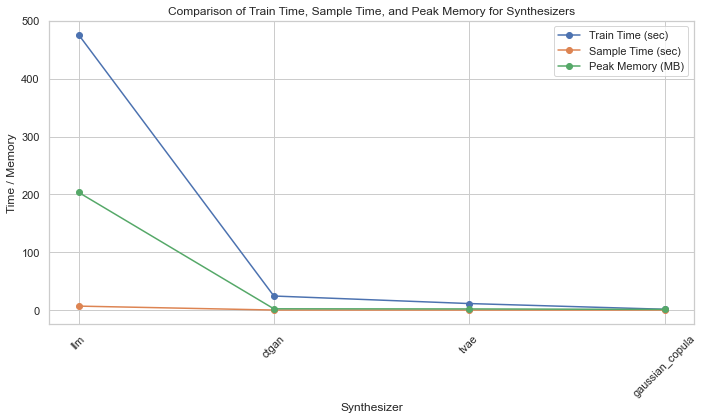

In [170]:
import matplotlib.pyplot as plt

data = [
    {
        "synthesizer": "llm",
        "train_time_sec": 476.2044608592987,
        "sample_time_sec": 6.975155353546143,
        "peak_memory_mb": 203.582248
    },
    {
        "synthesizer": "ctgan",
        "train_time_sec": 24.41493248939514,
        "sample_time_sec": 0.18914246559143066,
        "peak_memory_mb": 2.309114
    },
    {
        "synthesizer": "tvae",
        "train_time_sec": 11.382400512695312,
        "sample_time_sec": 0.1403203010559082,
        "peak_memory_mb": 2.076892
    },
    {
        "synthesizer": "gaussian_copula",
        "train_time_sec": 1.5321803092956543,
        "sample_time_sec": 0.12971162796020508,
        "peak_memory_mb": 1.288113
    }
]

synthesizers = [item["synthesizer"] for item in data]
train_times = [item["train_time_sec"] for item in data]
sample_times = [item["sample_time_sec"] for item in data]
peak_memory = [item["peak_memory_mb"] for item in data]

plt.figure(figsize=(10, 6))

# Plot train times
plt.plot(synthesizers, train_times, marker='o', label='Train Time (sec)')

# Plot sample times
plt.plot(synthesizers, sample_times, marker='o', label='Sample Time (sec)')

# Plot peak memory
plt.plot(synthesizers, peak_memory, marker='o', label='Peak Memory (MB)')

plt.xlabel('Synthesizer')
plt.ylabel('Time / Memory')
plt.title('Comparison of Train Time, Sample Time, and Peak Memory for Synthesizers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


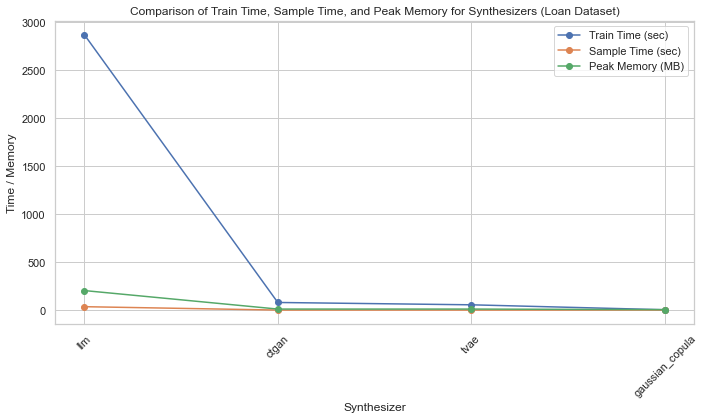

In [171]:
import matplotlib.pyplot as plt

data = [
    {
        "synthesizer": "llm",
        "train_time_sec": 2870.9475898742676,
        "sample_time_sec": 35.6428439617157,
        "peak_memory_mb": 203.695731
    },
    {
        "synthesizer": "ctgan",
        "train_time_sec": 79.54400062561035,
        "sample_time_sec": 0.41701245307922363,
        "peak_memory_mb": 10.730754
    },
    {
        "synthesizer": "tvae",
        "train_time_sec": 55.18127369880676,
        "sample_time_sec": 0.3914930820465088,
        "peak_memory_mb": 10.728637
    },
    {
        "synthesizer": "gaussian_copula",
        "train_time_sec": 3.711303234100342,
        "sample_time_sec": 0.3798370361328125,
        "peak_memory_mb": 5.018223
    }
]

synthesizers = [item["synthesizer"] for item in data]
train_times = [item["train_time_sec"] for item in data]
sample_times = [item["sample_time_sec"] for item in data]
peak_memory = [item["peak_memory_mb"] for item in data]

plt.figure(figsize=(10, 6))

# Plot train times
plt.plot(synthesizers, train_times, marker='o', label='Train Time (sec)')

# Plot sample times
plt.plot(synthesizers, sample_times, marker='o', label='Sample Time (sec)')

# Plot peak memory
plt.plot(synthesizers, peak_memory, marker='o', label='Peak Memory (MB)')

plt.xlabel('Synthesizer')
plt.ylabel('Time / Memory')
plt.title('Comparison of Train Time, Sample Time, and Peak Memory for Synthesizers (Loan Dataset)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
